In [4]:
#Задача 1
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import numpy as np
import math
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import datetime as dt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

dfs = pd.read_csv(r'C:\Users\Aleksey\Лекции по Python\season_2\athletes_sochi.txt').dropna()
alldata = dfs[['birthdate', 'weight', 'height', 'gender']]

def get_data(features, predicted):
    now = pd.Timestamp('now')
    new_gender = {"gender": {"Male" : 1, "Female" : 0}}
    newdata = dfs.replace(new_gender)
    now = pd.Timestamp('now')
    newdata['birthdate'] = pd.to_datetime(dfs['birthdate'], format='%Y-%m-%d')
    newdata['birthdate'] = newdata['birthdate'].where(newdata['birthdate'] < now, newdata['birthdate'] -  np.timedelta64(100, 'Y'))
    newdata['age'] = (now - newdata['birthdate']).astype('<m8[Y]')
    newdata["BMI"] = newdata["weight"] / (newdata["height"]**2)
    newdata = newdata.sample(frac=1)
    global allinput, alloutput
    allinput = newdata[features]
    alloutput = newdata[predicted]
    print(allinput, alloutput)

def train_and_test_model_linear():
    global X_train, X_test, Y_train, Y_test
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(allinput, alloutput, test_size=0.05)
#     scaler = MinMaxScaler(feature_range = (0,1))
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
    global model
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)
    global Y_test_predicted
    Y_test_predicted = model.predict(X_test)

def get_sex(myW, myH, myA):
    myBMI=myW/(myH**2)
    mysex=model.predict_proba([[myW, myH, myA, myBMI]])
    print('\n', mysex)

def precision_and_recall():
    [tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
    confusion_matrix(Y_test, Y_test_predicted)
    precision = tp / (tp + fp)
    recall = tp / tp + fn

    print('\n', "Precision: ", tp / (tp + fp))
    print("Recall: ", tp / (tp + fn))
    print("Accuracy: ", (tn + tp) / (tp + fp + tn + fn))
    print("F1: ",  (precision * recall) / ((precision) + recall))
    report = classification_report(Y_test, model.predict(X_test), target_names=['Male', 'Female'])
    print(report)

get_data(features = ['weight', 'height', 'age', 'BMI'], predicted = 'gender')
train_and_test_model_linear()
# get_sex(myW = 70, myH = 1.82, myA = 23)
precision_and_recall()
#Accuracy увеличивается за счет добавления BMI и возраста в модель, однако тогда в модели появляется мультиколлинеарность.
#Также accuracy увеличивается в зависимости от test_size датасета

      weight  height   age        BMI
692     80.0    1.88  33.0  22.634676
529     91.0    1.85  39.0  26.588751
1694    91.0    1.85  29.0  26.588751
1990    86.0    1.82  41.0  25.963048
548     95.0    1.90  36.0  26.315789
...      ...     ...   ...        ...
2278    72.0    1.70  34.0  24.913495
1964    91.0    1.83  40.0  27.173102
2713    71.0    1.85  38.0  20.745069
2195    72.0    1.78  33.0  22.724403
2802    55.0    1.60  35.0  21.484375

[2479 rows x 4 columns] 692     1
529     1
1694    1
1990    1
548     1
       ..
2278    1
1964    1
2713    1
2195    1
2802    0
Name: gender, Length: 2479, dtype: int64

 Precision:  0.9404761904761905
Recall:  0.9634146341463414
Accuracy:  0.9354838709677419
F1:  0.7614457831325301
              precision    recall  f1-score   support

        Male       0.93      0.88      0.90        42
      Female       0.94      0.96      0.95        82

    accuracy                           0.94       124
   macro avg       0.93      0.92  

C:\Users\Aleksey\AppData\Local\Temp/ipykernel_14532/1106160223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata['Cocoa\nPercent'] = alldata['Cocoa\nPercent'].apply(lambda x: x.replace('%', '')).astype('float')
C:\Users\Aleksey\AppData\Local\Temp/ipykernel_14532/1106160223.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata['Cocoa\nPercent'] = alldata['Cocoa\nPercent'] / 100
C:\Users\Aleksey\AppData\Local\Temp/ipykernel_14532/1106160223.py:13: SettingWithCopyWarning: 
A value is trying t

       REF  Review\nDate  Cocoa\nPercent  Rating Bean\nType
0     1876          2016            0.63    3.75      Other
1     1676          2015            0.70    2.75      Other
2     1676          2015            0.70    3.00      Other
3     1680          2015            0.70    3.50      Other
4     1704          2015            0.70    3.50      Other
...    ...           ...             ...     ...        ...
1790   647          2011            0.70    3.75      Other
1791   749          2011            0.65    3.00  Forastero
1792   749          2011            0.65    3.50  Forastero
1793   781          2011            0.62    3.25      Other
1794   486          2010            0.65    3.00      Other

[1793 rows x 5 columns]
col_0                     count
Bean\nType                     
Amazon                        1
Amazon mix                    2
Amazon, ICS                   2
Beniano                       3
Blend                        41
Blend-Forastero,Criollo       1

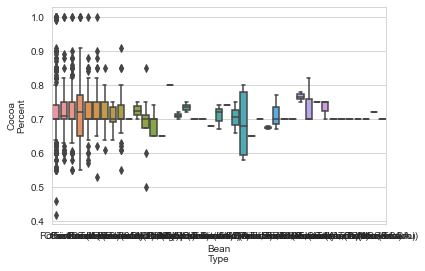

C:\Users\Aleksey\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


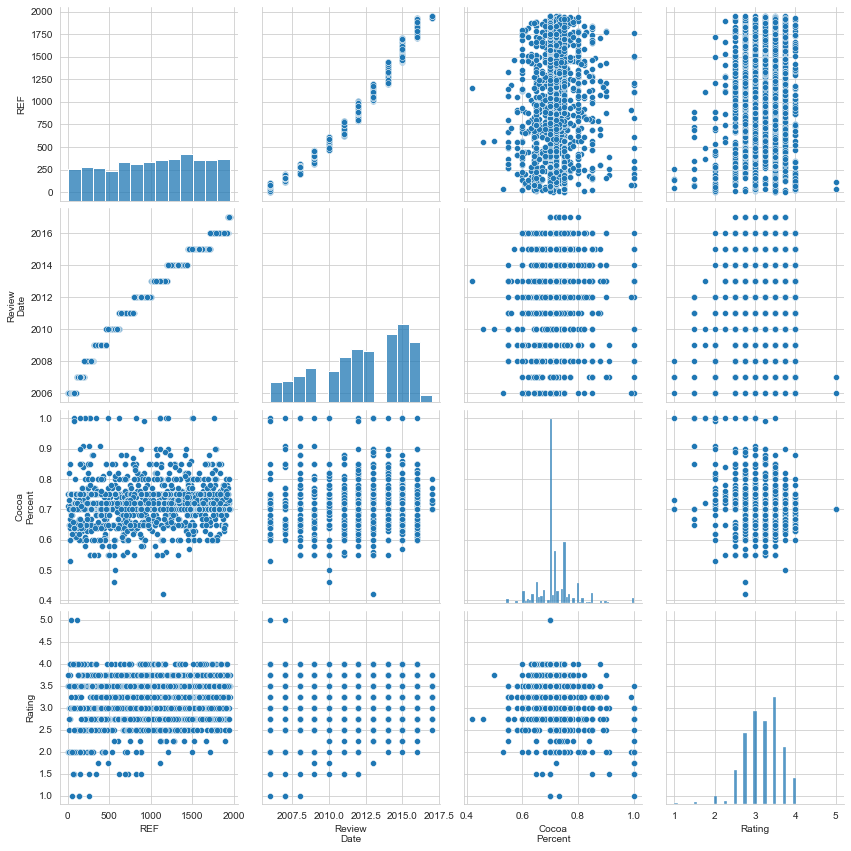

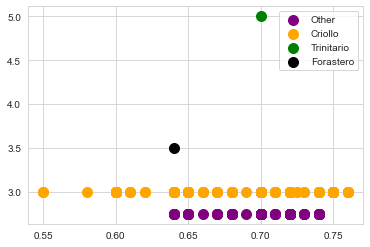

In [4]:
#Задача 2
#Здесь я попробовал применить этот метод, но похоже данный датасет не очень подходит для кластеризации
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.cluster import AffinityPropagation
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
cacao_dataframe = pd.read_csv('flavors_of_cacao.csv').dropna()
alldata = cacao_dataframe[['REF', 'Review\nDate', 'Cocoa\nPercent', 'Rating', 'Bean\nType']]
alldata['Cocoa\nPercent'] = alldata['Cocoa\nPercent'].apply(lambda x: x.replace('%', '')).astype('float')
alldata['Cocoa\nPercent'] = alldata['Cocoa\nPercent'] / 100
alldata['Bean\nType'] = alldata['Bean\nType'].apply(lambda y: y.replace(' ', 'Other')).astype('string')
print(alldata)
# grr = scatter_matrix(alldata, alpha=0.8, figsize=(10, 10))
# print(grr)
x = alldata.iloc[:, [2, 3]].values
outcome = pd.crosstab(index=alldata["Bean\nType"],  # Make a crosstab
                              columns="count")      # Name the count column

print(outcome)
# Other = alldata.loc[alldata["Bean\nType"] == 'Other']
# Trinitario = alldata.loc[alldata["Bean\nType"] == 'Trinitario']
# Criollo = alldata.loc[alldata['Bean\nType'] == 'Criollo']
sns.boxplot(x="Bean\nType",y="Cocoa\nPercent", data=alldata)
plt.show()
sns.set_style("whitegrid")
sns.pairplot(alldata, height="Bean\nType",size=3);
plt.show()
affinity = AffinityPropagation(damping = 0.9, max_iter = 1000)
y = affinity.fit_predict(x)
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'purple', label = 'Other')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'orange', label = 'Criollo')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'green', label = 'Trinitario')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 100, c = 'black', label = 'Forastero')

#Plotting the centroids of the clusters
# plt.scatter(affinity.cluster_centers_[:,0], affinity.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [20]:
# model = AffinityPropagation(damping = 0.9, max_iter = 1000)
# model.fit(x)
# predicted_label = model.predict([[500, 2010, 0.8, 1.6]])

# # Предсказание на всем наборе данных
# all_predictions = model.predict(x)

# Выводим предсказания
# print(predicted_label)
# print(all_predictions)